In [5]:
import sys
sys.path.append("/Users/octavia/Dropbox/SVE_v2/utilities")
sys.path.append("/Users/octavia/Dropbox/SVE_v2/model")

my_modules = ['plot_functions','load_model_output', 'search_functions', 
              'plot_3D_functions', 'input_veg']
for mod in my_modules:
    if mod in sys.modules: 
        del sys.modules[mod]

from plot_functions import *
from plot_3D_functions import *
from search_functions import *
from load_model_output import *
from input_veg import *

In [6]:
project_dir = "/Users/octavia/Dropbox/SVE_v2/" 

## Current

In [9]:
summary = summarize_param_files(project_dir)
summary.loc[["Lx", "Ly", "imodel", "Ks", "H_i", "veg_type", "topo"]].T


,Lx,Ly,imodel,Ks,H_i,veg_type,topo
test_stripe_dt_dx,30,4,1,5,0,stripe,plane
test_GW_GA,50,5,1,"[1.0, 2.0, 3.0]","[-0.1, -0.05, 0]",randv,plane
test_veg,NaN,NaN,1,1,0,from_file,plane
test_inflow_dx,50,4,1,5,0,randv,plane
test_GA_infl,20,10,1,"[1.0, 5.0]","[-0.05, -0.1]",randv,plane
test_topo_gauss,NaN,NaN,1,1,0,randv,gaussian
test_GW_phil,50,5,2,"[0.0, 0.1, 1.0, 2.0, 3.0]",0,randv,plane
test_inflow,50,4,1,5,0,randv,plane
test_topo,NaN,NaN,1,1,0,randv,from_file
test_stripe,100,4,1,5,"[0.0, -0.01, -0.1]",stripe,plane


## Chose a case


In [23]:
base_name = "test_topo_gauss"
base_name = "test_stripe"
base_dir = os.path.join(project_dir, 'model_output/', base_name )


In [24]:
print_input_params(base_dir, [ 'ncol', 'nrow', 'tr', 'dt_print'])

batch:
	Ks : 5.0
	H_i : 0.0, -0.01, -0.1
sim:
	fV : 0.2, 0.4, 0.6
	p : 3.0, 5.0
common:
	tr : 20
	dt_print : 10


In [25]:
core = load_sims(base_dir)
# core = patchy_update(core)

In [26]:
core[['t_final', 'runtime_hr']]

,t_final,runtime_hr
"H_i--0.01,Ks-5.0/fV-0.6,p-3.0/",4800,0.056180
"H_i--0.01,Ks-5.0/fV-0.4,p-3.0/",4800,0.066410
"H_i--0.01,Ks-5.0/fV-0.2,p-3.0/",4800,0.075420
"H_i--0.01,Ks-5.0/fV-0.6,p-5.0/",4800,0.060609
"H_i--0.01,Ks-5.0/fV-0.2,p-5.0/",4800,0.075974
"H_i--0.01,Ks-5.0/fV-0.4,p-5.0/",4800,0.069102
"H_i--0.1,Ks-5.0/fV-0.6,p-3.0/",4800,0.052262
"H_i--0.1,Ks-5.0/fV-0.4,p-3.0/",4800,0.063456
"H_i--0.1,Ks-5.0/fV-0.2,p-3.0/",4800,0.072614
"H_i--0.1,Ks-5.0/fV-0.6,p-5.0/",4800,0.055643


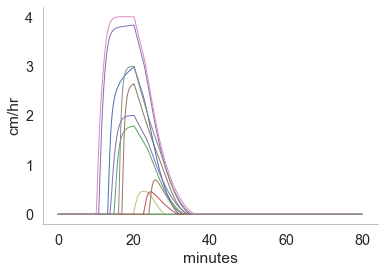

In [28]:
fig = plot_hydrographs(core[:20])

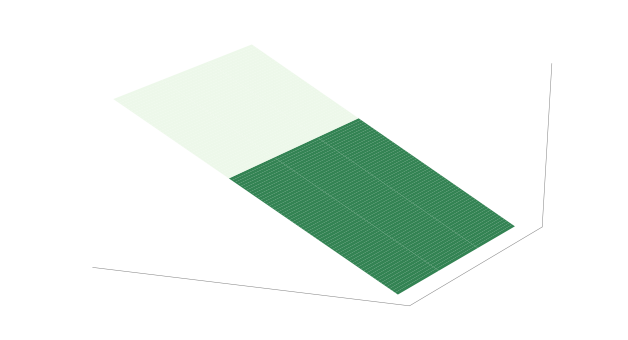

In [29]:
sim = core.iloc[0]
plot_3D_veg(sim);

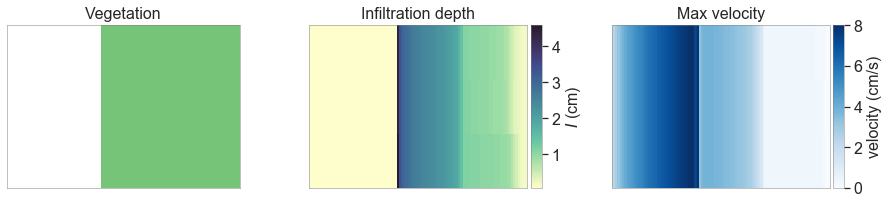

In [37]:
sim = core.iloc[0]
if sim.fV < 1:
    triptych(sim)

In [38]:
if sim.topo != "plane":
        triptych_micro(sim)